In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!nvidia-smi

Sun Jan  8 01:31:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Preparations

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw4/ex_2'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw4/ex_2
lab4_ex2.cu


#Compiling

In [43]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2

#Execution

In [7]:
!./lab4_ex2 131070

The input length is 131070.
CUDA Kernel duration of execution time and memory operations (in ms): 0.274902.
CPU & GPU results are equal.


#Profiling

In [44]:
!nvprof ./lab4_ex2 1234567

The input length is 1234567.
==20992== NVPROF is profiling process 20992, command: ./lab4_ex2 1234567
CUDA Kernel duration of execution time and memory operations (in ms): 2.101074.
CPU & GPU results are equal.
==20992== Profiling application: ./lab4_ex2 1234567
==20992== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   57.25%  1.8692ms        26  71.891us  26.751us  86.175us  [CUDA memcpy HtoD]
                   30.22%  986.54us        13  75.887us  22.655us  91.262us  [CUDA memcpy DtoH]
                   12.53%  408.95us        13  31.457us  27.167us  42.207us  vecAdd(double*, double*, double*, int, int)
      API calls:   95.40%  219.49ms         4  54.872ms  3.8163ms  207.96ms  cudaHostAlloc
                    2.76%  6.3542ms         4  1.5885ms  1.4587ms  1.8983ms  cudaFreeHost
                    0.77%  1.7688ms         1  1.7688ms  1.7688ms  1.7688ms  cudaDeviceSynchronize
                    0.48%  1.1125m

In [ ]:
!nvprof --output-profile hw_4_ex_2_vec_123456789.nvprof -f ./lab4_ex2 123456789

#Analysis and Plots ex2.2

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

##Absolute Time

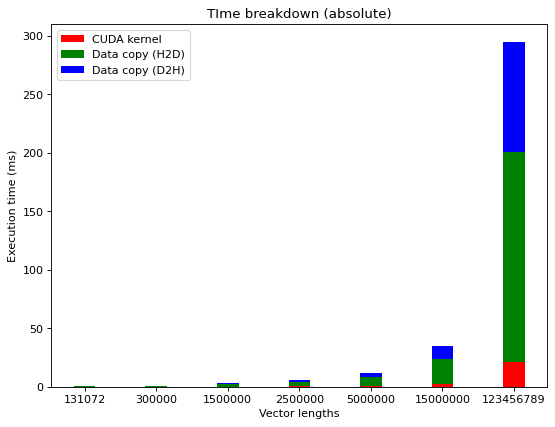

In [17]:
vectors = ['131072', '300000', '1500000', '2500000', '5000000', '15000000', '123456789']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_abs = np.array([212.89*10**-3, 443.42*10**-3,  2.1760, 3.6284, 7.2158, 21.593, 179.88])
time_datacopy_d2h_abs = np.array([99.676*10**-3, 225.92*10**-3,  1.1333, 1.8878, 3.7543, 11.313, 94.126])
time_cuda_kernel_abs = np.array([37.472*10**-3,  54.272*10**-3,  204.09*10**-3, 356.12*10**-3, 720.95*10**-3, 2.1990, 21.044])

plt.bar(vectors, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(vectors, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(vectors, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute)')
plt.xlabel('Vector lengths')
plt.ylabel('Execution time (ms)')
plt.legend()

## Relative Time

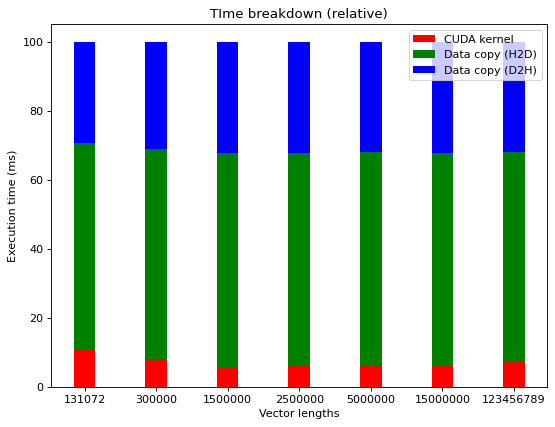

In [25]:
vectors = ['131072', '300000', '1500000', '2500000', '5000000', '15000000', '123456789']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_rel = np.array([59.84, 61.08, 61.84, 61.65, 61.77, 61.56, 60.95])
time_datacopy_d2h_rel = np.array([29.25, 31.11, 32.29, 32.34, 32.09, 32.16, 31.90])
time_cuda_kernel_rel = np.array([10.91, 7.81, 5.87, 6.01, 6.14, 6.28, 7.16])



plt.bar(vectors, time_cuda_kernel_rel, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(vectors, time_datacopy_h2d_rel, bottom=time_cuda_kernel_rel,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(vectors, time_datacopy_d2h_rel, bottom=time_datacopy_h2d_rel+time_cuda_kernel_rel,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (relative)')
plt.xlabel('Vector lengths')
plt.ylabel('Execution time (ms)')
plt.legend()

#Analysis & Plots ex2.3

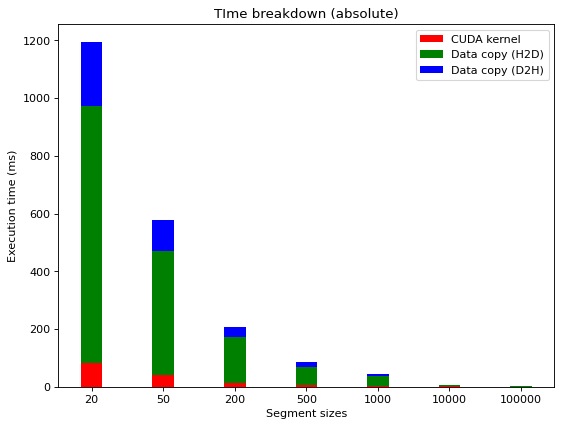

In [46]:
seg_size = ['20', '50', '200', '500', '1000', '10000', '100000']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_abs = np.array([892.47, 429.87, 161.29, 64.682, 32.521, 3.3387, 1.8692])
time_datacopy_d2h_abs = np.array([221.71, 106.81, 33.302, 14.543, 8.5385, 2.6890, 986.54*10**-3])
time_cuda_kernel_abs = np.array([81.768, 39.809, 12.119, 5.4541, 3.2126, 1.2561, 408.95*10**-3])

plt.bar(seg_size, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(seg_size, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(seg_size, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute)')
plt.xlabel('Segment sizes')
plt.ylabel('Execution time (ms)')
plt.legend()

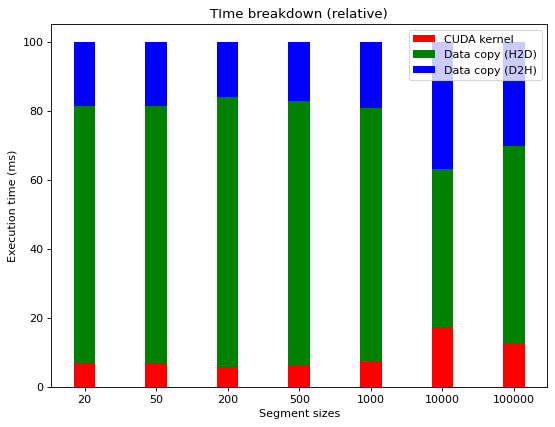

In [47]:
seg_size = ['20', '50', '200', '500', '1000', '10000', '100000']

figure(figsize=(8, 6), dpi=80)

time_datacopy_h2d_rel = np.array([74.62, 74.57, 78.03, 76.38, 73.46, 45.84, 57.25])
time_datacopy_d2h_rel = np.array([18.54, 18.53, 16.11, 17.17, 19.29, 36.92, 30.22])
time_cuda_kernel_rel = np.array([6.84, 6.91, 5.86, 6.44, 7.26, 17.24, 12.53])



plt.bar(seg_size, time_cuda_kernel_rel, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(seg_size, time_datacopy_h2d_rel, bottom=time_cuda_kernel_rel,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(seg_size, time_datacopy_d2h_rel, bottom=time_datacopy_h2d_rel+time_cuda_kernel_rel,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (relative)')
plt.xlabel('Segment sizes')
plt.ylabel('Execution time (ms)')
plt.legend()